In [3]:
import numpy as np
import pandas as pd
import rrcf as rrcf
import matplotlib.pyplot as plt
import pickle 
import dill
# Set sample parameters
np.random.seed(0)
data=pd.read_csv("Data_train.csv")
X=data[["dist_o1","vel1","mu_l"]].values
#X=data
print("Data X is :",X)
n=X.shape[0]
print(n)
d = X.shape[1]
print(d)
num_trees = 100
tree_size=90000
size=(n // tree_size, tree_size)
print("size of tree:",size)


forest = []
data.head()

Data X is : [[9.867e+01 2.642e+01 6.300e-01]
 [9.736e+01 2.611e+01 6.300e-01]
 [9.606e+01 2.580e+01 6.300e-01]
 ...
 [7.710e+00 1.000e-02 1.000e-02]
 [7.710e+00 1.000e-02 1.000e-02]
 [7.710e+00 0.000e+00 1.000e-02]]
367035
3
size of tree: (4, 90000)


,dist_o1,vel1,mu_l,action,shift_obstacle
0,98.67,26.42,0.63,1.0,0.0
1,97.36,26.11,0.63,1.0,0.0
2,96.06,25.80,0.63,1.0,0.0
3,94.78,25.49,0.63,1.0,0.0
4,93.51,25.18,0.63,1.0,0.0


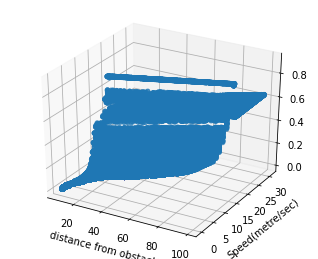

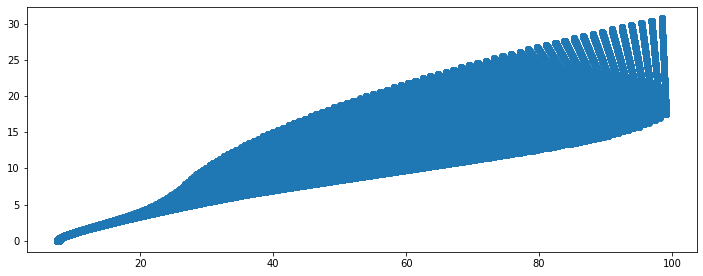

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import colors


fig = plt.figure(figsize=(12,4.5))
ax = fig.add_subplot(121, projection='3d')
sc = ax.scatter(X[:,0], X[:,1], X[:,2],
                cmap='gnuplot2')
plt.xlabel('distance from obstacle')
plt.ylabel('Speed(metre/sec)')
#plt.zlabel('Books Read')
plt.savefig('books_read.png')

fig = plt.figure(figsize=(12,4.5))
plt.scatter(X[:,0], X[:,1])

creatred tree: 0
creatred tree: 1
creatred tree: 2
creatred tree: 3
creatred tree: 4
creatred tree: 5
creatred tree: 6
creatred tree: 7
creatred tree: 8
creatred tree: 9
creatred tree: 10
creatred tree: 11
creatred tree: 12
creatred tree: 13
creatred tree: 14
creatred tree: 15
creatred tree: 16
creatred tree: 17
creatred tree: 18
creatred tree: 19
creatred tree: 20
creatred tree: 21
creatred tree: 22
creatred tree: 23
creatred tree: 24
length of forest: 100


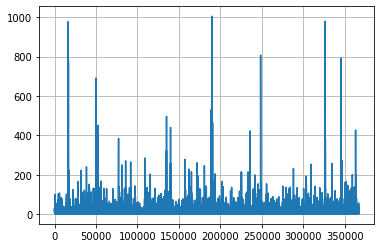

1004.0809208268755


"\nwith open('rcf_model', 'wb') as output:\n  dill.dump(forest, output, pickle.HIGHEST_PROTOCOL)\nnp.savez('training_details.npz',n=n,threshold=avg_codisp.max())\n"

In [8]:
# Set forest parameters
i=0

while len(forest) < num_trees:
    # Select random subsets of points uniformly from point set
    ixs = np.random.choice(n, size= size,
                           replace=False)
    #print(ixs)
    # Add sampled trees to forest
    trees = [rrcf.RCTree(X[ix], index_labels=ix) for ix in ixs]
    forest.extend(trees)
    print("creatred tree:",i)
    i+=1

print("length of forest:",len(forest))
avg_codisp = pd.Series(0.0, index=np.arange(n))
index = np.zeros(n)
for tree in forest:
    codisp = pd.Series({leaf : tree.codisp(leaf) for leaf in tree.leaves})
    avg_codisp[codisp.index] += codisp
    np.add.at(index, codisp.index.values, 1)
avg_codisp /= index


plt.plot(avg_codisp)
plt.hlines(25,1,2184,'r')
plt.grid()
plt.show()
print(avg_codisp.max())

"""
with open('rcf_model', 'wb') as output:
  dill.dump(forest, output, pickle.HIGHEST_PROTOCOL)
np.savez('training_details.npz',n=n,threshold=avg_codisp.max())
"""

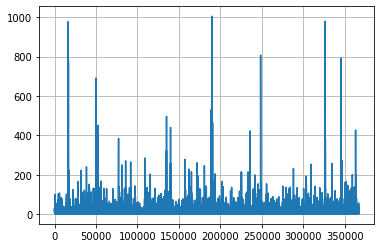

1004.0809208268755
9.172995377545009
44001     16.094115
366011    16.094256
226947    16.094395
6489      16.094525
14437     16.094548
            ...    
147959    27.979288
147864    38.073341
147738    28.210317
147782    25.744519
77387     35.568036
Length: 36000, dtype: float64


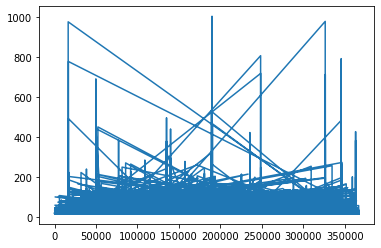

In [120]:
plt.plot(avg_codisp)
#plt.hlines(25,1,2184,'r')
plt.grid()
plt.show()
print(avg_codisp.max())
print(avg_codisp.mean())
ind = np.argpartition(avg_codisp, -36000)[-36000:]
print(avg_codisp[ind])
plt.plot(avg_codisp[ind])

In [121]:
trimmed_data= X[ind]
n=trimmed_data.shape[0]
print("n is:",n)

n is: 36000


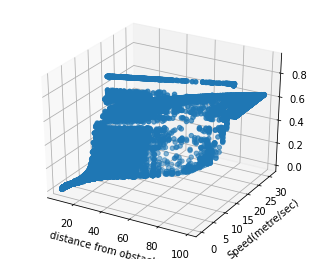

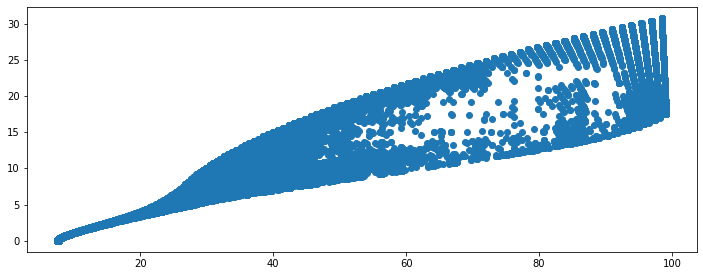

In [122]:
#plotting the top 10% of data(enough to represent the structure)
fig = plt.figure(figsize=(12,4.5))
ax = fig.add_subplot(121, projection='3d')
sc = ax.scatter(trimmed_data[:,0], trimmed_data[:,1], trimmed_data[:,2],
                cmap='gnuplot2')
plt.xlabel('distance from obstacle')
plt.ylabel('Speed(metre/sec)')
#plt.zlabel('Books Read')
plt.savefig('books_read.png')

fig = plt.figure(figsize=(12,4.5))
#plt.scatter(X[:,0], X[:,1])
plt.scatter(trimmed_data[:,0], trimmed_data[:,1])

creatred tree: 0
creatred tree: 1
creatred tree: 2
creatred tree: 3
creatred tree: 4
creatred tree: 5
creatred tree: 6
creatred tree: 7
creatred tree: 8
creatred tree: 9
creatred tree: 10
creatred tree: 11
creatred tree: 12
creatred tree: 13
creatred tree: 14
creatred tree: 15
creatred tree: 16
creatred tree: 17
creatred tree: 18
creatred tree: 19
creatred tree: 20
creatred tree: 21
creatred tree: 22
creatred tree: 23
creatred tree: 24
creatred tree: 25
creatred tree: 26
creatred tree: 27
creatred tree: 28
creatred tree: 29
creatred tree: 30
creatred tree: 31
creatred tree: 32
creatred tree: 33
creatred tree: 34
creatred tree: 35
creatred tree: 36
creatred tree: 37
creatred tree: 38
creatred tree: 39
creatred tree: 40
creatred tree: 41
creatred tree: 42
creatred tree: 43
creatred tree: 44
creatred tree: 45
creatred tree: 46
creatred tree: 47
creatred tree: 48
creatred tree: 49
creatred tree: 50
creatred tree: 51
creatred tree: 52
creatred tree: 53
creatred tree: 54
creatred tree: 55
cr

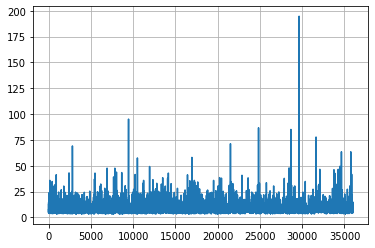

194.6674892678236


In [123]:
# Training forest with top few percent of data for final model
i=0
forest_final=[]
while len(forest_final) < num_trees:
    # Select random subsets of points uniformly from point se
    #print(ixs)
    # Add sampled trees to forest
    trees = rrcf.RCTree(trimmed_data)
    forest_final.append(trees)
    print("creatred tree:",i)
    i+=1

print("length of forest:",len(forest))
avg_codisp = pd.Series(0.0, index=np.arange(n))
index = np.zeros(n)
for tree in forest_final:
    codisp = pd.Series({leaf : tree.codisp(leaf) for leaf in tree.leaves})
    avg_codisp[codisp.index] += codisp
    np.add.at(index, codisp.index.values, 1)
avg_codisp /= index


plt.plot(avg_codisp)
plt.grid()
plt.show()
thresold=avg_codisp.max()
print(avg_codisp.max())

In [124]:
with open('rcf_model_10percent', 'wb') as output:
  dill.dump(forest_final, output, pickle.HIGHEST_PROTOCOL)
np.savez('training_details_10p.npz',n=n,threshold=avg_codisp.max())

In [52]:
np.savetxt("training_disp_data.csv", avg_codisp, delimiter=",")

In [23]:
#thresold=avg_codisp.max()
dis_train=pd.read_csv("training_disp_data.csv").values
rollout= pd.read_csv("foo13.csv").values

In [24]:
total_disp_data=np.concatenate((dis_train,rollout),axis=0)
total_disp_data

array([[2.46999489e+00],
       [9.29179223e+00],
       [2.00922985e+01],
       ...,
       [8.61755845e+03],
       [8.21384845e+03],
       [6.73192945e+03]])

In [25]:
thresold=194.66
#fig = plt.figure(figsize=(12,4.5))
#plt.plot(total_disp_data)
#plt.hlines(thresold,1,total_disp_data.shape[0],'r')
#plt.grid()

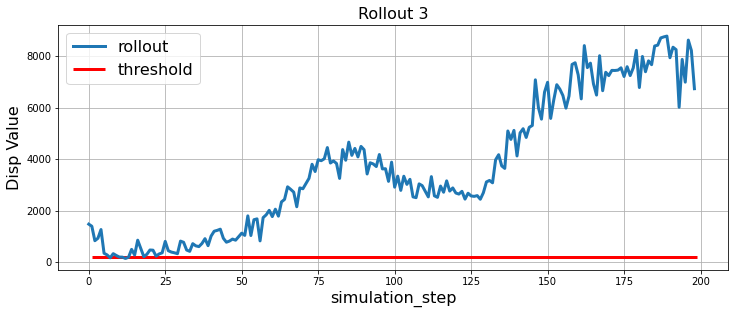

In [26]:
fig = plt.figure(figsize=(12,4.5))
plt.plot(rollout,label="rollout",lw=3)
plt.hlines(thresold,1,rollout.shape[0],'r',label="threshold",lw=3)
plt.grid()
plt.legend(loc="best",fontsize=16)
plt.xlabel('simulation_step', fontsize=16)
plt.ylabel('Disp Value', fontsize=16)
plt.title('Rollout 3', fontsize=16)
plt.savefig("rollout3.png")

In [107]:
 #plotting anomalous data with training data
data_odd2=pd.read_csv('Data3.csv')
odd_data2=data_odd2[["dist_o1","vel1","mu_l"]].values
#plotting anomalous  and nodd data with training data
data_noodd=pd.read_csv('Data1.csv')
nodd_data=data_noodd[["dist_o1","vel1","mu_l"]].values
#plotting anomalous  and nodd data with training data
data_odd1=pd.read_csv('Data2.csv')
odd1_data=data_odd1[["dist_o1","vel1","mu_l"]].values

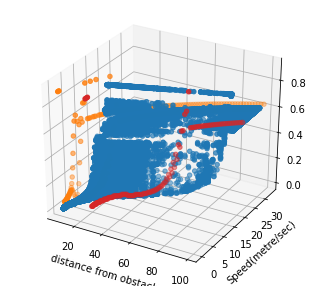

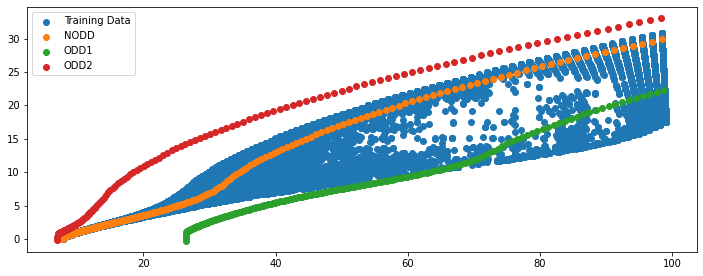

In [108]:
#plotting the top 10% of data(enough to represent the structure)
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121, projection='3d')
sc = ax.scatter(trimmed_data[:,0], trimmed_data[:,1], trimmed_data[:,2],
                cmap='gnuplot2')
sc = ax.scatter(odd_data[:,0], odd_data[:,1], odd_data[:,2],
                cmap='gnuplot2')
sc = ax.scatter(nodd_data[:,0], nodd_data[:,1], nodd_data[:,2],
                cmap='gnuplot2')
sc = ax.scatter(odd1_data[:,0], odd1_data[:,1], odd1_data[:,2],
                cmap='gnuplot2')
plt.xlabel('distance from obstacle')
plt.ylabel('Speed(metre/sec)')
#plt.zlabel('Books Read')
plt.savefig('books_read.png')

fig = plt.figure(figsize=(12,4.5))
plt.scatter(trimmed_data[:,0], trimmed_data[:,1],label="Training Data")
plt.scatter(nodd_data[:,0], nodd_data[:,1],label="NODD")
plt.scatter(odd1_data[:,0], odd1_data[:,1],label="ODD1")
plt.scatter(odd_data2[:,0], odd_data2[:,1],label="ODD2")
plt.legend(loc="upper left")

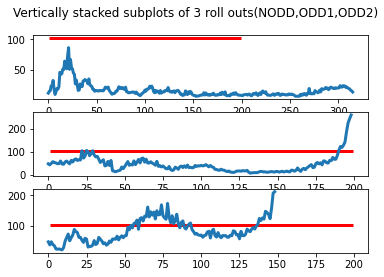

In [93]:
rollout1=pd.read_csv('foo1.csv')
rollout2=pd.read_csv('foo2.csv')
rollout3=pd.read_csv('foo3.csv')
fig, (ax1, ax2,ax3) = plt.subplots(3)
fig.suptitle('Vertically stacked subplots of 3 roll outs(NODD,ODD1,ODD2)')
ax1.hlines(thresold,1,rollout.shape[0],'r',label="threshold",lw=3)
ax1.plot(rollout1,label="rollout",lw=3)
ax2.hlines(thresold,1,rollout.shape[0],'r',label="threshold",lw=3)
ax2.plot(rollout2,label="rollout",lw=3) 
ax3.hlines(thresold,1,rollout.shape[0],'r',label="threshold",lw=3)
ax3.plot(rollout3,label="rollout",lw=3) 